In [27]:
library(MCMCglmm)
library(lme4) #random effect'lmerTest' should be used in place of 'lme4', If lmer model p-values are desired 
library(brms) #preditability with baysian approach
library(ggplot2) #plot
library(MuMIn) #r.squaredGLMM
library(merTools) #simulations
library(optimx) #different optimizer to help model to converge 
#library("posterior") #not sue I am using it as brms should have it already in its package, althought it is base don this package

In [28]:
#citation("merTools")

In [29]:
library(parallel)
my.cores = detectCores()

library(lme4)
library(arm)
library(MuMIn)
library(tidyverse)
library(plyr)
library(broom)
library(coda)
library(grid)
library(gridExtra)
library(brms)
library(broom.mixed)
library(merTools)
library(tidybayes)
library(parallel)

# Download data

In [30]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_dr = file.path(path_,'Drivers')
df = read.csv(file.path(path_dr,'df_rawweight.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID)   
#mean-centering of the environmental variable so that intercepts reflect average values for the population and individuals
#df$cDIB = as.integer(df$DIB) 
#df$DPT_scale = scale(df$DPT, center=TRUE, scale=TRUE)
#df$DPT_scale_2 = poly(df$DPT_scale, degree=2, raw=TRUE)
#df$DPT2 = poly(df$DPT, degree=2, raw=TRUE)
#df$DPT2_scale = scale(df$DPT2, center=TRUE, scale=TRUE)
#df$avgDIB_scale = scale(df$avgDIB, center=TRUE, scale=TRUE)
df$DPT_100 = df$DPT/100
print(dim(df))
summary(df)

[1] 1050    7


     HenID        variable             weight         date          
 hen_1  :   6   Length:1050        Min.   : 974   Length:1050       
 hen_10 :   6   Class :character   1st Qu.:1639   Class :character  
 hen_101:   6   Mode  :character   Median :1768   Mode  :character  
 hen_102:   6                      Mean   :1715                     
 hen_105:   6                      3rd Qu.:1879                     
 hen_106:   6                      Max.   :2331                     
 (Other):1014                      NA's   :151                      
      DOA             DPT           DPT_100     
 Min.   :118.0   Min.   :  0.0   Min.   :0.000  
 1st Qu.:173.0   1st Qu.: 55.0   1st Qu.:0.550  
 Median :229.0   Median :111.0   Median :1.110  
 Mean   :246.7   Mean   :128.7   Mean   :1.287  
 3rd Qu.:313.0   3rd Qu.:195.0   3rd Qu.:1.950  
 Max.   :418.0   Max.   :300.0   Max.   :3.000  
                                                

In [31]:
df_2predictweight = read.csv(file.path(path_dr,'df_2predictweight.csv'), header = TRUE, sep = ";")
df_2predictweight$HenID = as.factor(df_2predictweight$HenID)   
df_2predictweight$DPT_100 = df_2predictweight$DPT/100
head(df_2predictweight,3)

,HenID,DPT,DPT_100
,<fct>,<int>,<dbl>
1,hen_1,0,0
2,hen_10,0,0
3,hen_101,0,0


In [32]:
length(unique(df[['HenID']]))

[1] 175

# Individual personality

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: weight ~ DPT_100 + (1 | HenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 12012.7  12031.9  -6002.4  12004.7      895 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1882 -0.5683  0.2831  0.7234  2.8671 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept)  5710     75.56  
 Residual             32579    180.50  
Number of obs: 899, groups:  HenID, 175

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 1471.939     11.946  540.139  123.22   <2e-16 ***
DPT_100      186.862      6.544  795.486   28.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
DPT_100 -0.716

R2m,R2c
0.4451344,0.5278785


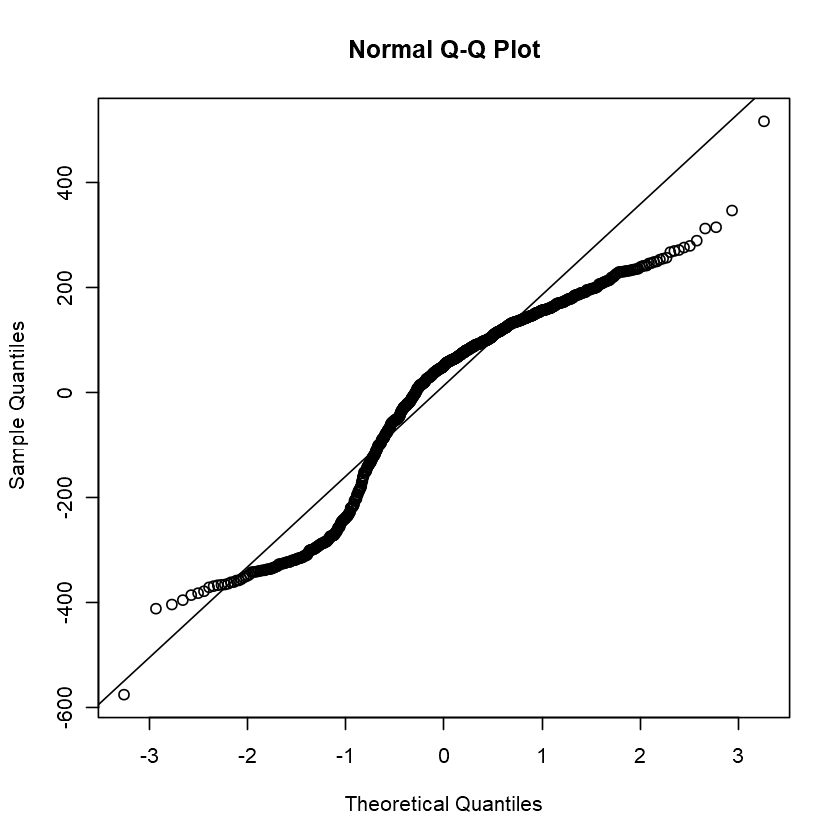

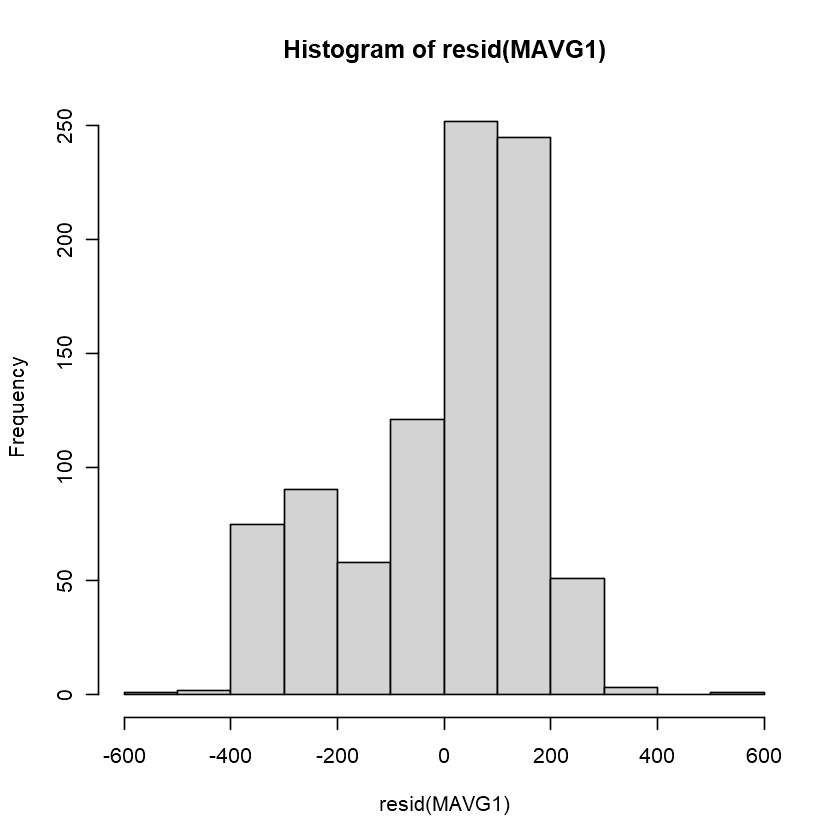

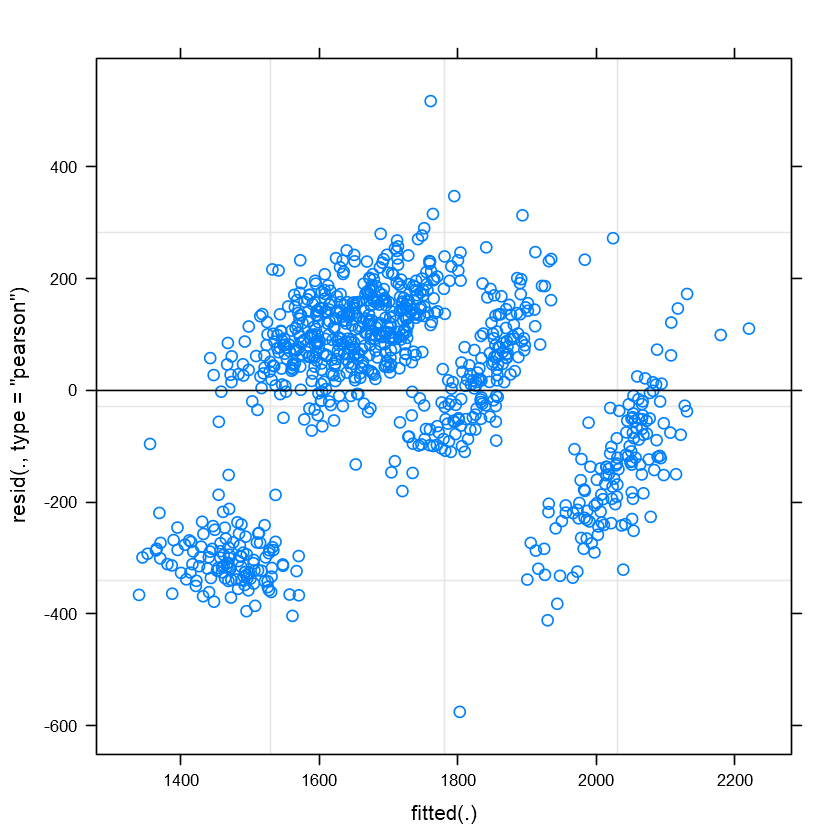

In [33]:
MAVG1 = lmerTest::lmer(weight ~ DPT_100 + (1|HenID), REML=FALSE, data=df)
summary(MAVG1)
r.squaredGLMM(MAVG1)
###### normally distributed residuals
qqnorm(resid(MAVG1))
qqline(resid(MAVG1))
hist(resid(MAVG1))
######check homogeneity of variance (residuals has constant variance)
plot(MAVG1)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: weight ~ poly(DPT_100, degree = 3) + (1 | HenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 10706.2  10735.0  -5347.1  10694.2      893 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4420 -0.5633 -0.0193  0.5582  3.7713 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 10628    103.09  
 Residual              5390     73.42  
Number of obs: 899, groups:  HenID, 175

Fixed effects:
                            Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                 1698.840      8.189   174.971  207.46   <2e-16 ***
poly(DPT_100, degree = 3)1  6183.464     86.091   740.685   71.83   <2e-16 ***
poly(DPT_100, degree = 3)2 -4563.768     82.263   726.792  -55.48   <2e-16 ***
poly(DPT_100, degree = 3)3  2180.305     80.077   726.819   27.23   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '

R2m,R2c
0.7703749,0.92273


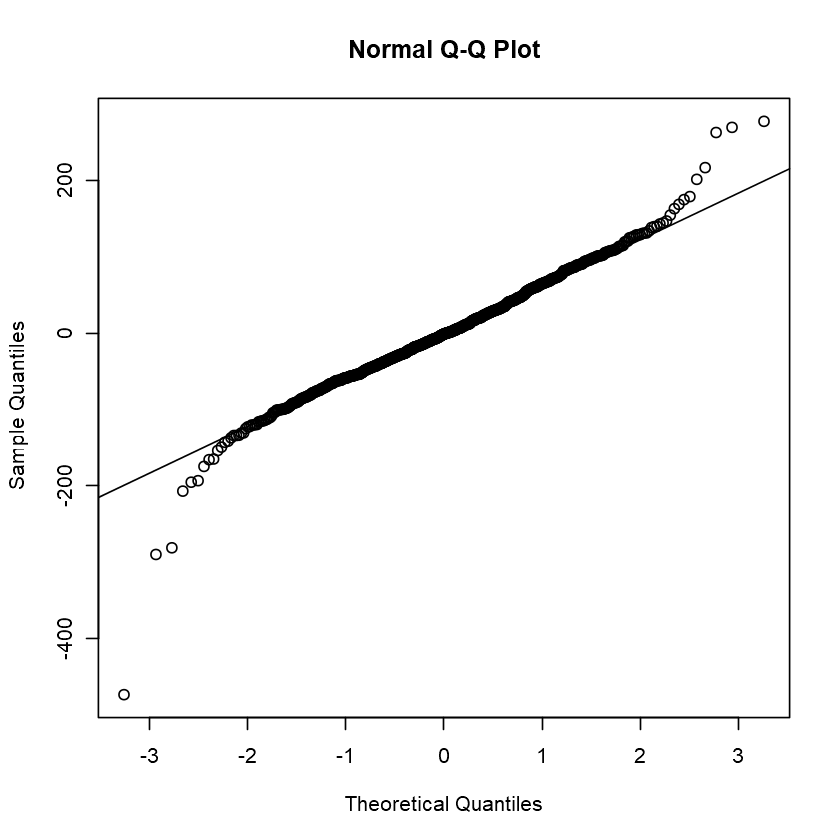

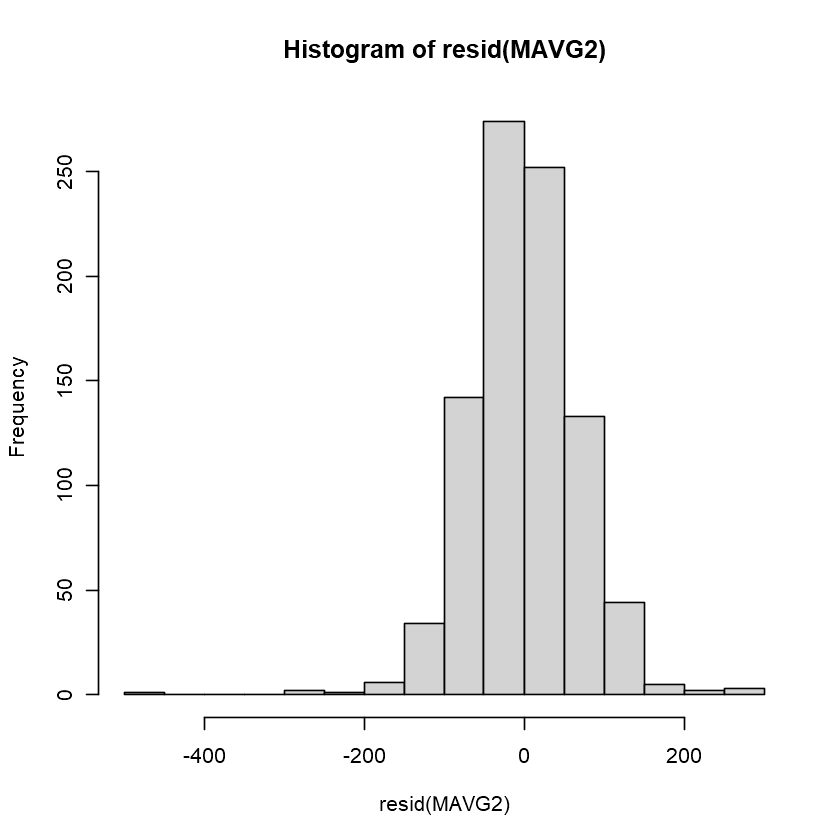

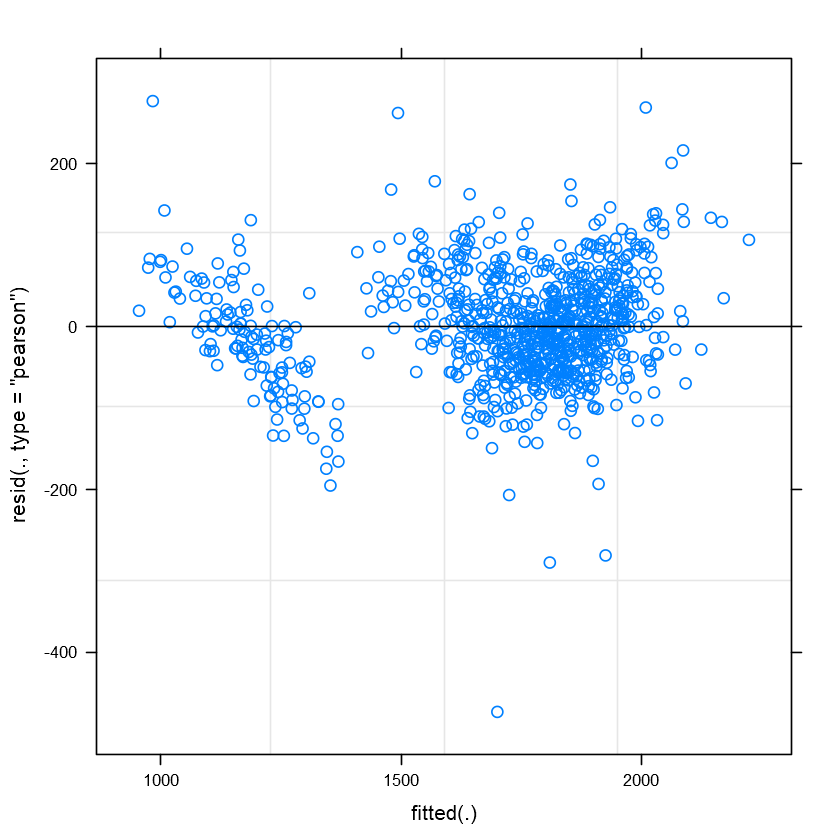

In [43]:
#we use raw=TRUE to be comparable, but then we will set it to FALSE to avoid collineartiy issues
#poly(cDIB, 2, raw = FALSE)1 is the slope coefficient of the quadratic function 
#poly(cDIB, 2, raw = FALSE)2 is the quadratic coefficient of the quadratic functionthat reflects the curvature of the regression
MAVG2 = lmerTest::lmer(weight ~ poly(DPT_100,degree=3) + (1|HenID), REML=FALSE, data = df)
summary(MAVG2)
r.squaredGLMM(MAVG2)
###### normally distributed residuals
qqnorm(resid(MAVG2))
qqline(resid(MAVG2))
hist(resid(MAVG2))
######check homogeneity of variance (residuals has constant variance)
plot(MAVG2)

In [44]:
df_2predictweight$predictedWeight = predict(MAVG2, newdata=df_2predictweight, re.form = NULL)
write.csv(df_2predictweight, file.path(path_,'Drivers','Estimatedweight.csv'), row.names = FALSE)
df_2predictweight

HenID,DPT,DPT_100,predictedWeight
<fct>,<int>,<dbl>,<dbl>
hen_1,0,0,1171.208
hen_10,0,0,1009.618
hen_101,0,0,1103.453
hen_102,0,0,1353.070
hen_105,0,0,1109.646
hen_106,0,0,1188.390
hen_107,0,0,1235.738
hen_108,0,0,1150.557
hen_109,0,0,1073.763
